Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85      6765
           1       0.71      0.64      0.67      3235

    accuracy                           0.80     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.79      0.80      0.80     10000

Confusion Matrix:
 [[5910  855]
 [1159 2076]]


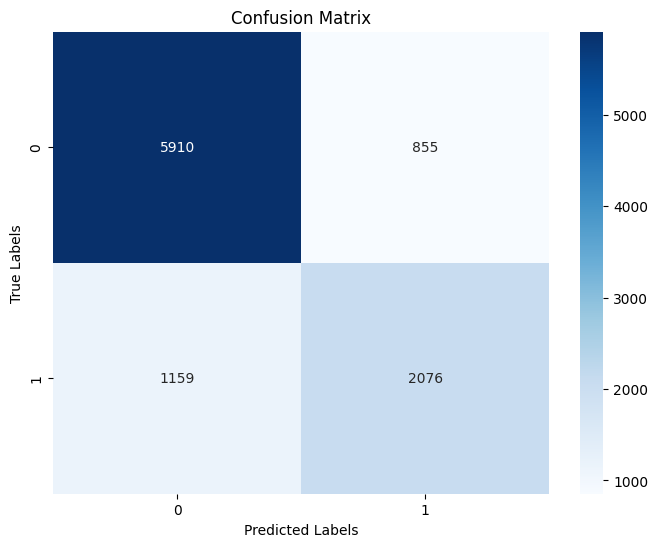

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# 1. Data Loading
data = pd.read_csv('synthetic_fraud_dataset.csv')

# 2. Data Preprocessing
X = data.drop('Fraud_Label', axis=1)
y = data['Fraud_Label']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(include=np.number).columns

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data, transform the test data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# 3. Model Training
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# 4. Evaluation
y_pred = model.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 5. Visualization (Confusion Matrix)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

